In [7]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np

# 10.1
### c)

C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


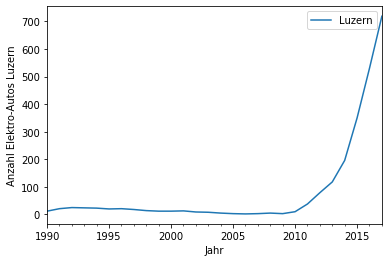

In [4]:
pw_electric = pd.read_csv('../01 Modulunterlagen/SW10/PW_electric.csv', sep=',', skiprows=2, header=0, encoding = "utf-8", index_col=0)
pw_electric.head()
pw_electric_luzern = pd.DataFrame(pw_electric.ix["Luzern",1:])
pw_electric_luzern
pw_electric_luzern["Year"] = pd.to_datetime(pw_electric_luzern.index)
pw_electric_luzern.set_index("Year", inplace=True)
pw_electric_luzern.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Luzern")
plt.show()

### d)

C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


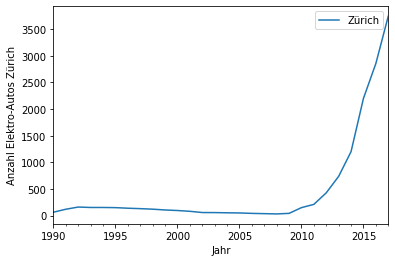

In [5]:
pw_electric = pd.read_csv('../01 Modulunterlagen/SW10/PW_electric.csv', sep=',', skiprows=2, header=0, encoding = "utf-8", index_col=0)
pw_electric.head()
pw_electric_züri = pd.DataFrame(pw_electric.ix["Zürich",1:])
pw_electric_züri
pw_electric_züri["Year"] = pd.to_datetime(pw_electric_züri.index)
pw_electric_züri.set_index("Year", inplace=True)
pw_electric_züri.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Zürich")
plt.show()

### e)

C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\LI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


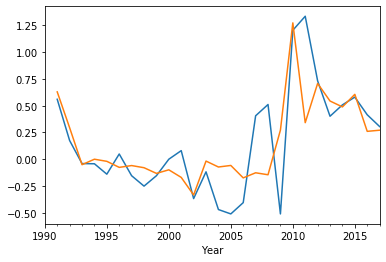

In [11]:
# Luzern
pw_electric_luzern["rel"] = np.log(pw_electric_luzern.astype('float')) - np.log(pw_electric_luzern.shift(1).astype('float'))
# Zürich
pw_electric_züri["rel"] = np.log(pw_electric_züri.astype('float')) - np.log(pw_electric_züri.shift(1).astype('float'))

pw_rel = pd.DataFrame({"Luzern"})

pw_electric_luzern["rel"].plot()
pw_electric_züri["rel"].plot()
plt.show()

# 10.2
### a)

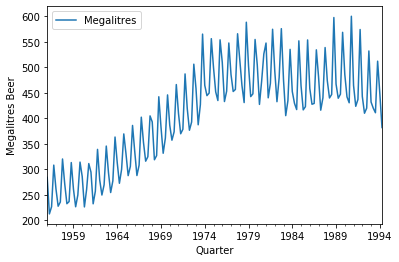

In [43]:
AusBeer = pd.read_csv("../01 Modulunterlagen/SW10/AustralianBeer.csv",sep=";",header=0)
AusBeer.head()
AusBeer["Quarter"] = pd.to_datetime(AusBeer["Quarter"])
AusBeer.set_index("Quarter", inplace=True)
AusBeer.columns=["Megalitres"]
AusBeer.head()
AusBeer.describe()
AusBeer.plot()
plt.ylabel("Megalitres Beer")
AusBeer2=AusBeer.copy()

### b)

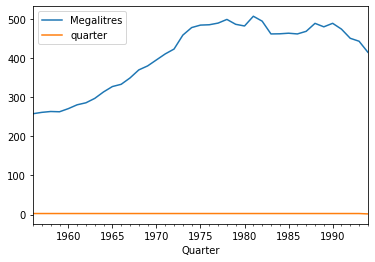

In [39]:
AusBeer.resample("A").mean().plot()

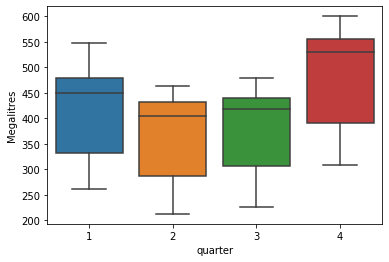

In [42]:
import seaborn as sns
AusBeer['quarter'] = AusBeer.index.quarter
sns.boxplot(data=AusBeer, x='quarter', y="Megalitres")

man kann die Beiden auch kombinieren

### c)

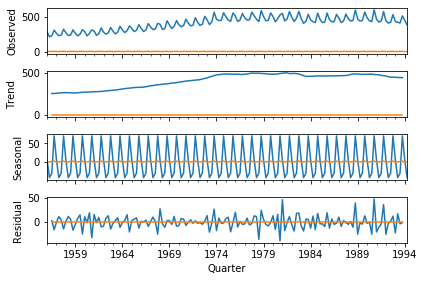

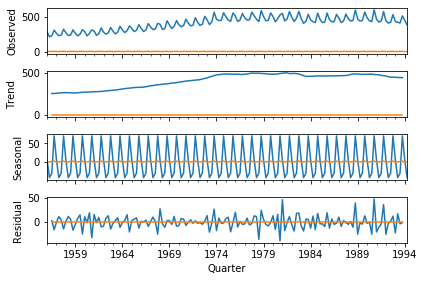

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(AusBeer1, model="additive", freq=4).plot()

Es ist kein wirkliches Muster erkennbar --> keine Transformation notwendig (Varianz scheint stabil zu sein).

### d)

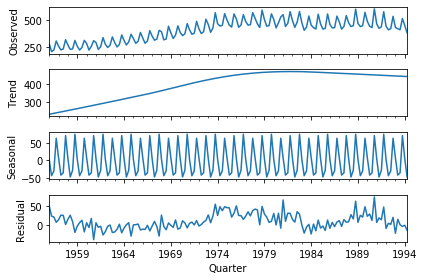

In [27]:
from stldecompose import decompose
AusBeer_stl = decompose(AusBeer["Megalitres"], period=12)
AusBeer_stl.plot();

Das Residual weisst ebenfalls kein Muster auf.<br/>
Die Seasonal-Kurve ist nicht mehr konstant.

# 10.3
### a)

Text(0, 0.5, 'Million Kilowatthours')

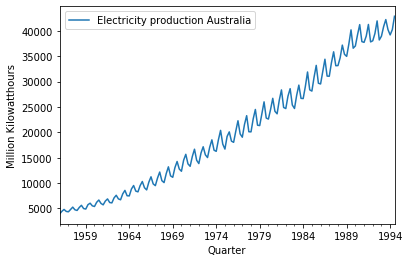

In [28]:
Electricity = pd.read_csv("../01 Modulunterlagen/SW10/AustralianElectricity.csv", sep=";", header=0)
Electricity.head()
Electricity["Quarter"] = pd.to_datetime(Electricity["Quarter"])
Electricity.set_index("Quarter", inplace=True)
Electricity.columns=["Electricity production Australia"]
Electricity.head()
Electricity.plot()
plt.ylabel("Million Kilowatthours")

### b)

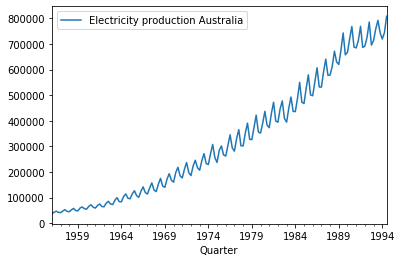

In [53]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
# replace "yourSeries" by the name of your series
Electricity_tr = boxcox(Electricity, 1.3)
Electricity_tr.plot()
plt.show()

Beim Wert 1.3 sieht man, dass die Varianz am Anfang viel zu klein ist. Ein Wert gegen 0.5 - 0.0 sollte korrekt sein (testen)

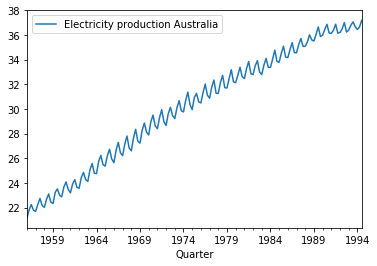

In [54]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
# replace "yourSeries" by the name of your series
Electricity_tr = boxcox(Electricity, 0.2)
Electricity_tr.plot()
plt.show()

### c)

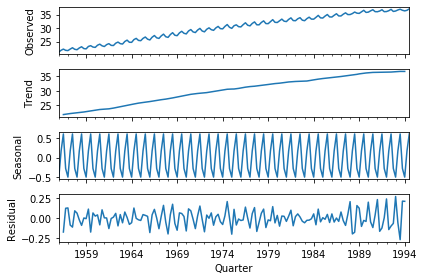

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Electricity_tr, model="additive", freq=4).plot()
plt.show()

Kommentar (vor Lambda-Anpassung):
Eine Datentransformation wäre sicherlich angebracht, da der Residual ein Muster aufzeigt und somit nicht eindeutig ist.<br/>
Kommentar (nach Lambda): Nach einer Datentransformation kann die Zeitreihe gut zerlegt werden --> kein Muster erkennbar (ausser von 1989 - 1994 zeichnet sich ein saisonaler Effekt ab).

### d)

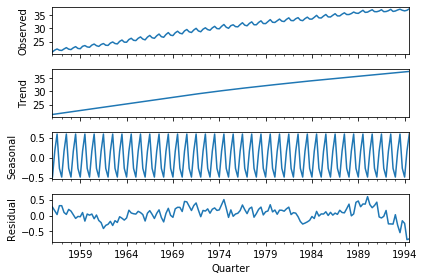

In [61]:
from stldecompose import decompose
Electricity_stl = decompose(Electricity_tr, period=4)
Electricity_stl.plot();

keine Ahnung wofür period verwendet wird, jedoch sieht der Wert 4 gut aus.